In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [41]:
# pd.set_option('display.max_rows', None)
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
## check null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [43]:
data = data[data['caa'] != 4]
data = data[data['thall'] != 0]
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trtbps    296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalachh  296 non-null    int64  
 8   exng      296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slp       296 non-null    int64  
 11  caa       296 non-null    int64  
 12  thall     296 non-null    int64  
 13  output    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB
None


In [45]:
x = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values
# X = data.iloc[:,:-1].values
# y = data.iloc[:,-1].values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
from sklearn.naive_bayes import GaussianNB
## Train the model using Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [49]:
y_pred_gnb = gnb.predict(x_test)

In [50]:
# melakukan prediksi pada data pengujian
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred_gnb)
print('Akurasi:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred_gnb))

Akurasi: 0.8202247191011236
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.78      0.89      0.83        44

    accuracy                           0.82        89
   macro avg       0.83      0.82      0.82        89
weighted avg       0.83      0.82      0.82        89



<Axes: >

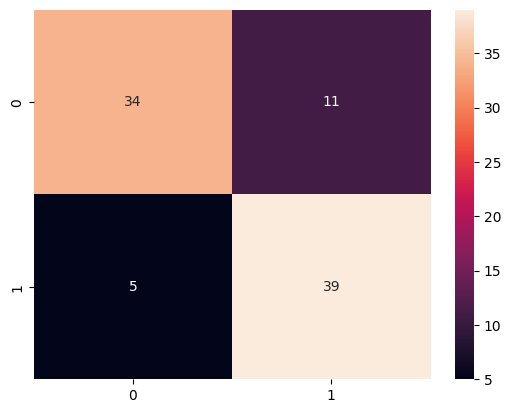

In [51]:
# menghitung confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sb

sb.heatmap(confusion_matrix(y_test,y_pred_gnb), annot=True)

In [52]:
from sklearn.metrics import accuracy_score
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, y_pred_gnb)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  82.02247191011236 %


In [53]:
from sklearn.metrics import mean_absolute_error,r2_score

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('R2 Score:', r2)
    print('MAE:', mae)
    
calculate_regression_metrics(y_test,y_pred_gnb)

R2 Score: 0.28080808080808084
MAE: 0.1797752808988764


In [54]:
# Misalkan input_data berisi atribut yang ingin diprediksi
input_data = np.array([[37,1,2,130,250,0,1,187,0,3.5,0,0,2]])  # Ganti dengan atribut yang Anda inginkan

# Normalisasi data input
input_data = scaler.transform(input_data)

# Melakukan prediksi pada data input
prediction = gnb.predict(input_data)

# Mengonversi label prediksi menjadi keterangan yang lebih mudah dibaca
if prediction == 0:
    result = "Lebih Sedikit Kemungkinan Serangan Jantung"
else:
    result = "Lebih Banyak Kemungkinan Serangan Jantung"

print("Hasil Prediksi:", result)

Hasil Prediksi: Lebih Banyak Kemungkinan Serangan Jantung


In [55]:
# print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, result)*100, "%")
print(prediction)

[1]


In [56]:
with open('model.pkl', 'wb') as file:
    pickle.dump(gnb, file)

In [57]:
with open('x_train.pkl', 'wb') as file:
    pickle.dump(x_train, file)

In [58]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)